In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

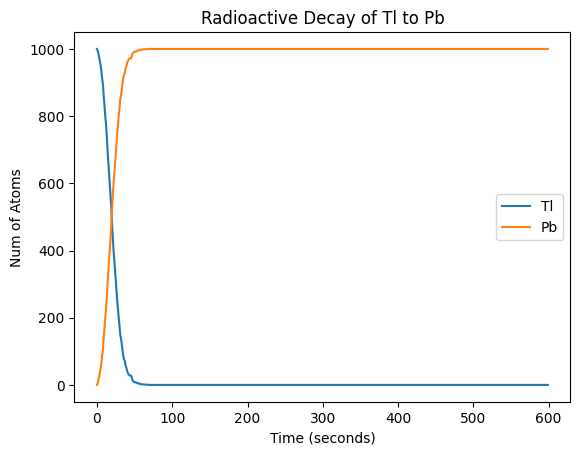

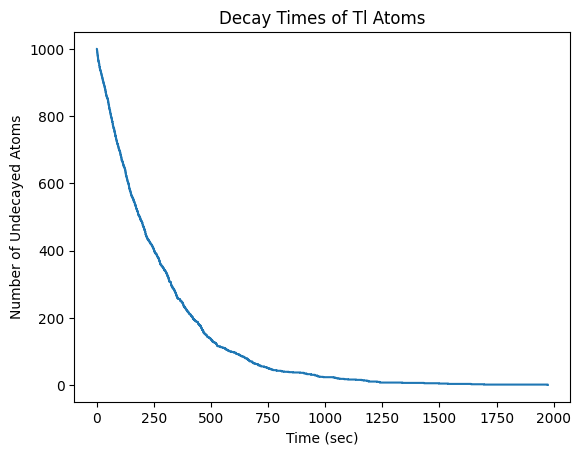

In [3]:
#Defining the constants
half_life = 3.052 * 60  # half-life in seconds
tot_time = 600  # total simulation time in seconds
num_atoms = 1000  # initial number of Tl atoms

#Inizilizing the variables
tl_atoms = num_atoms
pb_atoms = 0
tl_count = []
pb_count = []
times = np.arange(0, tot_time, 1)

#Simulating the loop
for t in times:
    decay_prob = 1 - 2 ** (-t / half_life)
    decays = np.random.binomial(tl_atoms, decay_prob)
    tl_atoms -= decays
    pb_atoms += decays
    tl_count.append(tl_atoms)
    pb_count.append(pb_atoms)

# lotting
plt.plot(times, tl_count, label="Tl")
plt.plot(times, pb_count, label="Pb")
plt.xlabel("Time (seconds)")
plt.ylabel("Num of Atoms")
plt.title("Radioactive Decay of Tl to Pb")
plt.legend()
plt.show()

#Function to calculate decay time using the inverse transform method
def decay_time(u, half_life):
    return -np.log(1 - u) * half_life / np.log(2)

#Generating 1000 random numbers
rnd_num = np.random.uniform(0, 1, num_atoms)

#Calculating decay times
decay_times = np.sort(decay_time(rnd_num, half_life))

#Counting undecayed atoms
undecayed_atoms = num_atoms - np.arange(num_atoms)
times = np.linspace(0, tot_time, num_atoms)

#Plotting
plt.step(decay_times, undecayed_atoms, where='post')
plt.xlabel("Time (sec)")
plt.ylabel("Number of Undecayed Atoms")
plt.title("Decay Times of Tl Atoms")
plt.show()


2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

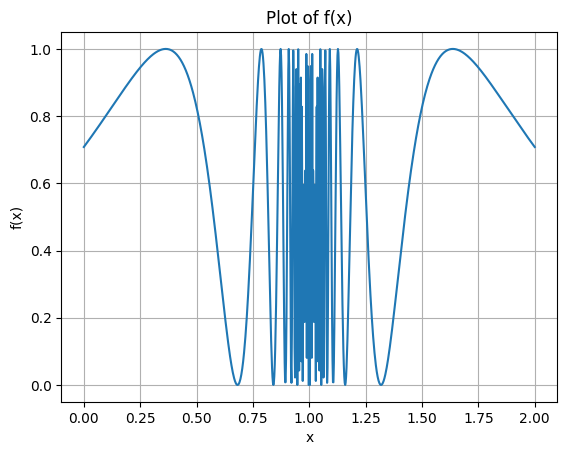

Estimated integral: 1.346914033349706
Estimated error: 0.0008805668557317512
Mean Value Method - Estimated integral: 1.3469592535953518
Mean Value Method - Estimated error: 0.0007340860883387892

Comparison:
Hit/Miss Method - Estimated error: 0.0008805668557317512
Mean Value Method - Estimated error: 0.0007340860883387892


In [11]:
#Defining the function
def function(x):
    return np.sin(1/(1-x))**2

#Generating x values
x_val = np.linspace(0, 2, 1000)

#Compute the f(x) val
y_val = function(x_val)

#Plotting the function
plt.plot(x_val, y_val)
plt.title('Plot of f(x)')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

#Monte Carlo integrating
def integration(N):
    count = 0
    y_max = max(function(x_val))
    for _ in range(N):
        x = np.random.uniform(0, 2)
        y = np.random.uniform(0, y_max)
        if y <= function(x):
            count += 1

    area = 2 * y_max
    integral = area * count / N
    return integral

# Error estimation
N = 10000  # Numb of points for each trial
trials = 100  # Num of trials
results = [integration(N) for _ in range(trials)]
mean_integral = np.mean(results)
std_dev = np.std(results) / np.sqrt(trials)

print(f"Estimated integral: {mean_integral}")
print(f"Estimated error: {std_dev}")

# Mean Value Monte Carlo Integration
def mean_value_inte(N):
    x = np.random.uniform(0, 2, N)
    f_val = function(x)
    mean_f = np.mean(f_val)
    return 2 * mean_f  # Multiply by the length of the interval

# Error estimation
mean_val_res = [mean_value_inte(N) for _ in range(trials)]
mean_val_int = np.mean(mean_val_res)
mean_val_std_dev = np.std(mean_val_res) / np.sqrt(trials)

print(f"Mean Value Method - Estimated integral: {mean_val_int}")
print(f"Mean Value Method - Estimated error: {mean_val_std_dev}")

# Comparison
print("\nComparison:")
print(f"Hit/Miss Method - Estimated error: {std_dev}")
print(f"Mean Value Method - Estimated error: {mean_val_std_dev}")


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [12]:
def circle(N):
    count = 0
    for _ in range(N):
        # Random point in [-1, 1] x [-1, 1]
        x, y = np.random.uniform(-1, 1, 2)  
        if x**2 + y**2 <= 1:
            count += 1
    return 4 * count / N  # Scaling by the area of the enclosing square

# Num of points
N = 1000000
circle_area = circle(N)
print(f"Estimated Area of the Unit Circle: {circle_area}")

def sphere(N):
    count = 0
    for _ in range(N):
        point = np.random.uniform(-1, 1, 10)  # Random point in 10D space
        if np.sum(point**2) <= 1:
            count += 1
    return 2**10 * count / N  # Scaling by the volume of the enclosing hypercube

# Num of points
N = 1000000
sphere = sphere(N)
print(f"Estimated Volume of the 10D Unit Sphere: {sphere}")


Estimated Area of the Unit Circle: 3.139716
Estimated Volume of the 10D Unit Sphere: 2.477056


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [14]:
def integrand(x):
    return x**(-0.5) / (np.exp(x) + 1)

def pdf(x, a):
    return beta.pdf(x, a, 1)

def imp_samp(N, a):
    samples = np.random.beta(a, 1, N)
    weights = integrand(samples) / pdf(samples, a)
    return np.mean(weights)

#Num of samples
N = 100000
#Parameters for the beta
a = 0.5 

int_est = imp_samp(N, a)
print(f"Estimated value of the integral: {int_est}")


Estimated value of the integral: 0.8387689462409723
